# Εργασία 1

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Μέρος 1

## Ερώτημα 1

Ανάγνωση CSV αρχείου

In [2]:
df = pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Η μέθοδος "describe" επιστρέφει πλήθος, τυπική απόκληση, μέση, ελάχιστη και μέγιστη τιμή, καθώς και τα 25/50/75 percentiles.

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


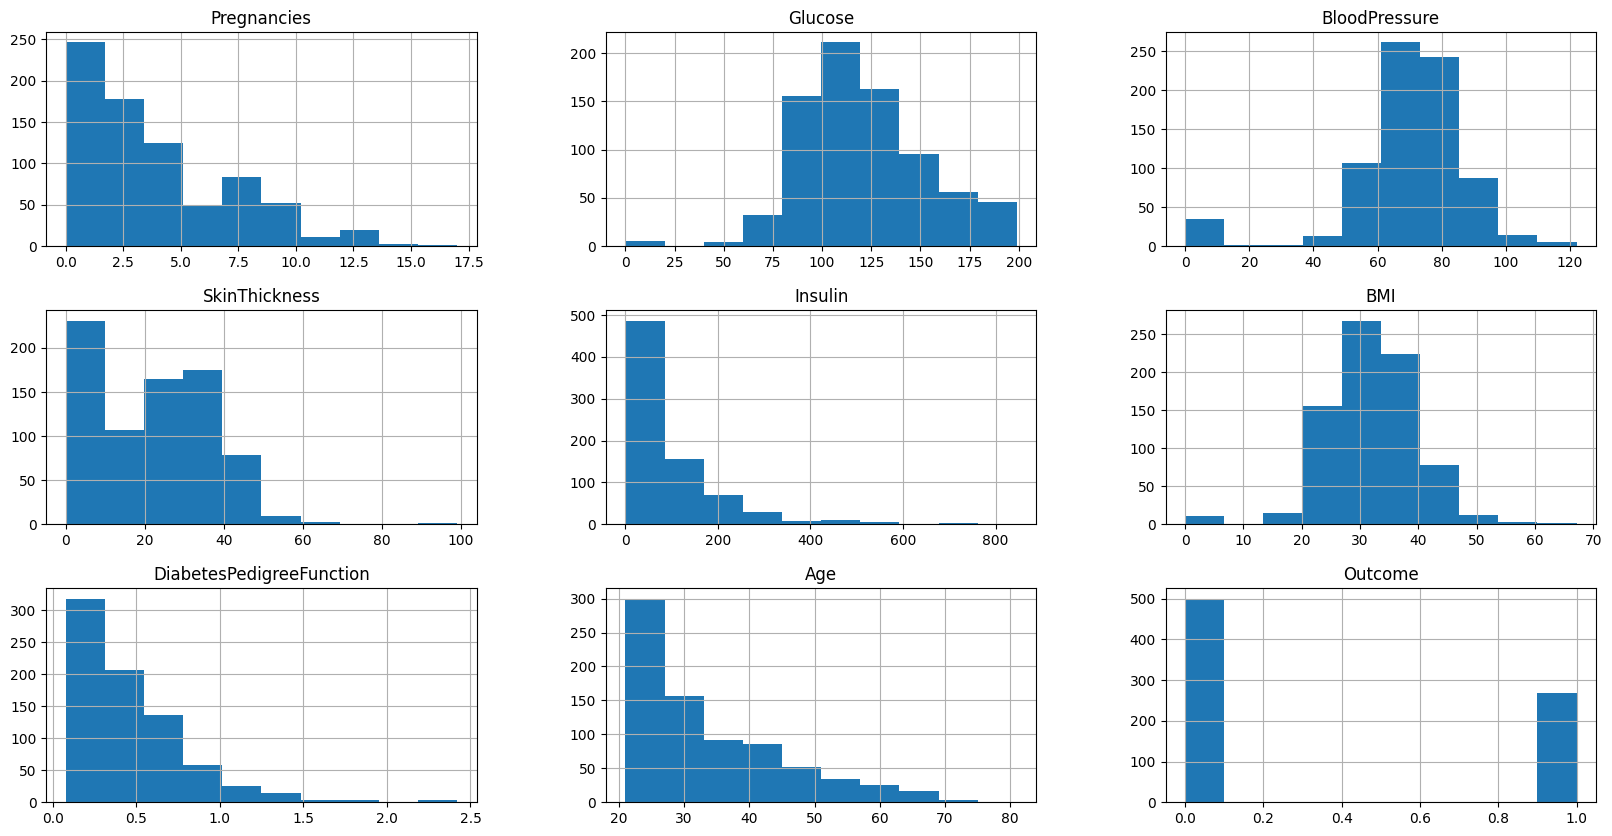

In [4]:
df.hist(figsize=(20,10))
plt.show()

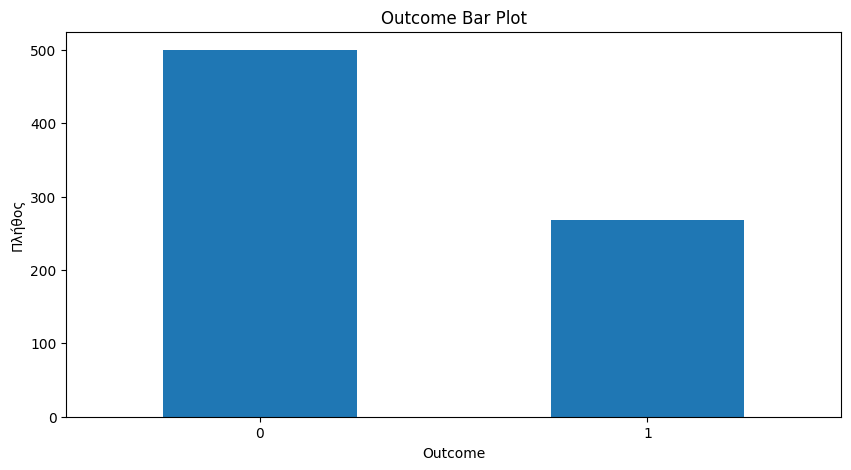

In [5]:
df['Outcome'].value_counts().plot(kind = 'bar', figsize=(10,5), title = 'Outcome Bar Plot', rot=0)
plt.ylabel('Πλήθος')
plt.xlabel('Outcome')
plt.show()

## Ερώτημα 2

Στα χαρακτηριστικά Glucose, BloodPressure, SkinThickness, Insulin και BMI παρατηρούνται ελάχιστες τιμές 0, κάτι που δεν έχει νόημα για ιατρικά δεδομένα (π.χ. ένας ασθενής δεν μπορεί να έχει πίεση αίματος 0). Αυτό θα μπορούσε να οφείλεται σε ελλειπούσες τιμές ή κακή καταγραφή δεδομένων. Ωστόσο οι τιμές αυτές θα μπορούσαν στην παρούσα μορφή να επιρρεάσουν το μοντέλο οδηγόντας σε λανθασμένα συμπεράσματα.

Επιπλέον παρατηρούμε ότι η μεταβλητή στόχος (outcome) έχει πολύ περισσότερες τιμές 0, και άρα θα υπάρχει μεροληψία υπέρ αυτού του αποτελέσματος κατά την εκπαίδευση του μοντέλου και άρα αυτό θα τείνει να προβλέπει αποτέλεσμα 0 για περισσότερες περιπτώσεις ασθενών.

Βάση των παραπάνω η ποιότητα των δεδομένων κρίνεται ως κακή.

## Ερώτημα 3



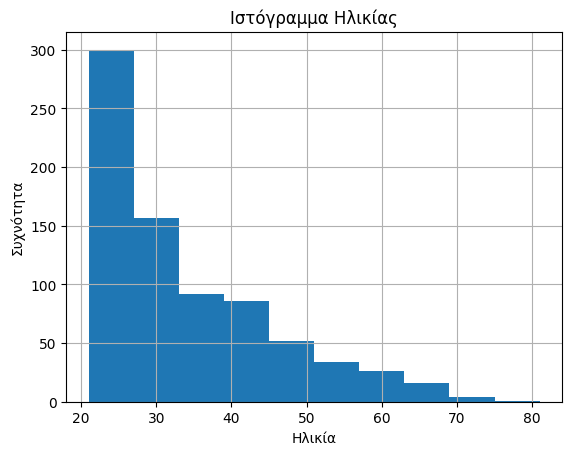

In [6]:
df['Age'].hist()
plt.title('Ιστόγραμμα Ηλικίας')
plt.xlabel('Ηλικία')
plt.ylabel('Συχνότητα')
plt.show()

Η ηλικία ακολουθεί εκθετική κατανομή με το μεγαλύτερο πλήθος να συγκεντρώνεται σε νεότερες ηλικίες με μικρή εκπροσώπηση δείγματος σε ηλικίες άνω των 50 ετών.

Η κατανομή δεν είναι ιδανική για την κατασκευή της εφαρμογής καθώς υπάρχει ασυμμετρία ως προς τις τιμές με πολύ μεγαλύτερη συγκέντρωση στις μικρές ηλικίες. Αυτό θα μπορούσε να δημιουργήσει  ανακρίβειες στις προβλέψεις για ασθενείς μεγαλύτερης ηλικίας, που ενδεχομένως να διατρέχουν μεγαλύτερο κίνδυνο να ασθενήσουν από διαβήτη.

## Ερώτημα 4

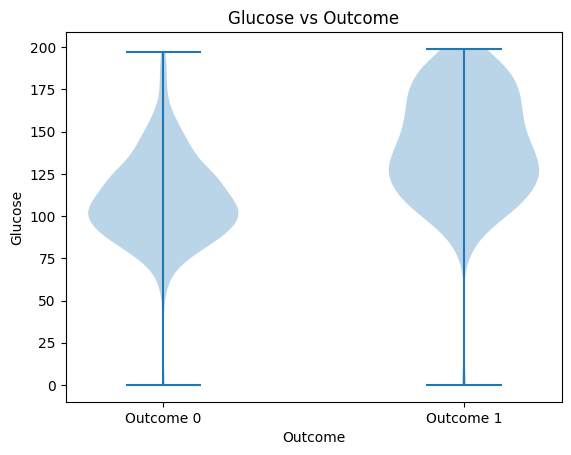

In [7]:
plt.violinplot([df[df['Outcome'] == 0]['Glucose'], df[df['Outcome'] == 1]['Glucose']])
plt.xticks([1, 2], ['Outcome 0', 'Outcome 1'])
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Glucose vs Outcome')
plt.show()

Από το violin plot βλέπουμε ότι ασθενείς με διαβήτη έχουν και ψηλά επίπεδα γλυκόζης. Αυτό επιβεβαώνει τις κλινικές μελέτες για τα δεδομένα που επεξεργαζόμαστε.

## Ερώτημα 5

In [8]:
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(f"παραδείγματα εκπαίδευσης: {len(x_train)}")
print(f"παραδείγματα επικύρωσης: {len(x_test)}")

παραδείγματα εκπαίδευσης: 537
παραδείγματα επικύρωσης: 231


## Ερώτημα 6

In [9]:
model = LogisticRegression(random_state=0, max_iter=256)
model.fit(x_train, y_train)
# model doesn't require 256 iterations, but it's a pretty round number :D
# uncomment line below to check number of actual iterations.
# print(model.n_iter_)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια Μοντέλου: {round(accuracy, 2)}")

Ακρίβεια Μοντέλου: 0.78


Η ακρίβεια του μοντέλου είναι ~78%. Αυτό σημαίνει ότι μπορεί να έχουμε αρνητικές προβλέψεις (δεν έχει διαβήτη) για ασθενή που όντως πάσχει ή αντίθετα θετικές προβλέψεις (έχει διαβήτη) για κάποιον υγιή.

## Ερώτημα 7

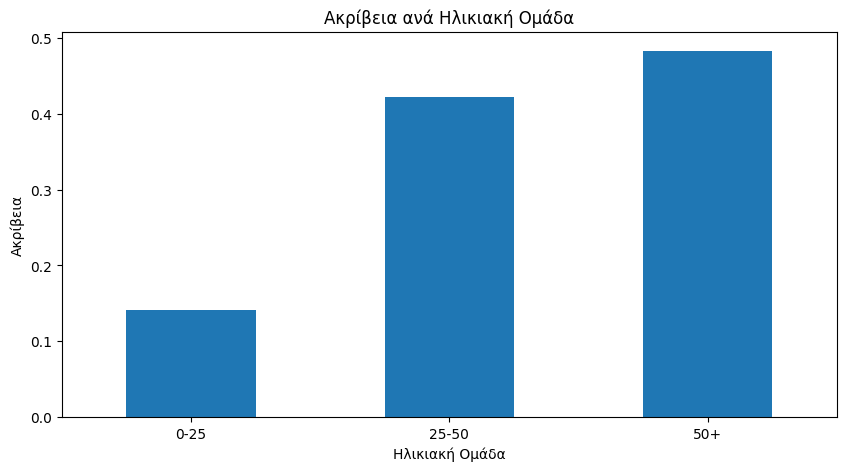

In [10]:
df_2 = df.copy()
bins = [0, 25, 50, float('inf')]
labels = ['0-25', '25-50', '50+']
age_groups = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df_2['Age_Group'] = age_groups

accuracy_by_age = df_2.groupby('Age_Group', observed = True)['Outcome'].mean()

accuracy_by_age.plot(kind='bar', figsize=(10,5), title='Ακρίβεια ανά Ηλικιακή Ομάδα', ylabel='Ακρίβεια', xlabel='Ηλικιακή Ομάδα', rot=0)
plt.show()

## Ερώτημα 8

Χειρότερο είναι να προβλέπει ότι ένας που ασθενεί πραγματικά από διαβήτη δεν ασθενεί, παρά να κατηγοριοποιεί έναν υγιή ως ασθενή.

Στην πρώτη περίπτωση ο ασθενής διατρέχει πραγματικό κίνδυνο για την υγεία του, τον οποίο βάση του μοντέλου θα αγνοεί, ενώ ενδεχομένως να χρειάζεται ιατρική φροντίδα ή/και φαρμακευτική αγωγή. Η μη αντιμετώπιση του διαβήτη θα οδηγήσει σε χειρότερες επιπλοκές στο μέλλον.

Στη δεύτερη περίπτωση ένας που θα έχει κατηγοριοποιηθεί ως ασθενής ενώ δεν είναι θα χρειαστεί μία σειρά ιατρικών εξετάσεων και θα είναι θύμα μίας αχρείαστης ταλαιπωρίας, ωστόσο πέραν αυτών δε θα διατρέχει κάποιο κίνδυνο για την υγεία του από το διαβήτη.

## Ερώτημα 9

In [11]:
accuracy_list = []

for seed in range(10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
  model = LogisticRegression(random_state=0, max_iter=256)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)

print(f"Μέση Ακρίβεια: {round(mean_accuracy, 2)}")
print(f"Τυπική Απόκλιση Ακρίβειας: {round(std_accuracy, 2)}")

Μέση Ακρίβεια: 0.77
Τυπική Απόκλιση Ακρίβειας: 0.02


## Ερώτημα 10

In [12]:
scaler = MinMaxScaler()
x = df.drop(columns=['Outcome'])
y = df['Outcome']

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

scaled_model = LogisticRegression(random_state=0, max_iter=256)
scaled_model.fit(x_scaled, df['Outcome'])

top_features = pd.DataFrame({'Feature': x_scaled.columns, 'Coefficient': scaled_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
print(top_features)


                    Feature  Coefficient
1                   Glucose     4.856010
5                       BMI     3.261590
0               Pregnancies     1.554917
6  DiabetesPedigreeFunction     1.506648
7                       Age     0.978712
3             SkinThickness     0.194376
4                   Insulin    -0.122658
2             BloodPressure    -0.749140


Οι συντελεστές Glucose, BMI και Pregnacies έχουν τις μεγαλύτερες τιμές σε σχέση με τους υπόλοιπους και άρα θα έχουν μεγαλύτερη επιρροή στην πρόβλεψη του κατά πόσο ένας εν δυνάμει ασθενής έχει διαβήτη ή όχι.

# Μέρος 2

## Ερώτημα 1

In [13]:
features = ['Pregnancies', 'BloodPressure', 'BMI', 'Age']
x_linear = df[features].values
y_linear = df['Glucose'].values

x_linear_train, x_linear_test, y_linear_train, y_linear_test = train_test_split(x_linear, y_linear, test_size=0.3, random_state=0)


## Ερώτημα 2

In [14]:
linear_model = LinearRegression()
linear_model.fit(x_linear_train, y_linear_train)

y_linear_pred = linear_model.predict(x_linear_test)

mse = mean_squared_error(y_linear_test, y_linear_pred)
mae = mean_absolute_error(y_linear_test, y_linear_pred)

print(f"Mean Squared Error: {round(mse, 2)}")
print(f"Mean Absolute Error: {round(mae, 2)}")


Mean Squared Error: 929.89
Mean Absolute Error: 23.6


Η ΜΑΕ είναι η πιο κατάλληλη μετρική καθώς είναι πιο ανθεκτική σε outliers, αφού δεν τετραγωνίζει τα σφάλματα και είναι πιο εύκολο να ερμηνευτεί.

## Ερώτημα 3

In [15]:
lasso_mae_list = []
alpha = 0.2
alpha_list = []

while alpha <= 1.0:
  lasso_model = Lasso(alpha = alpha, max_iter = 256)
  lasso_model.fit(x_train, y_train)
  lasso_y_pred = lasso_model.predict(x_test)
  lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
  lasso_mae_list.append(lasso_mae)

  alpha_list.append(alpha)
  alpha += 0.2

pd.DataFrame({'Alpha': alpha_list, 'MAE': lasso_mae_list})

,Alpha,MAE
0,0.2,0.353001
1,0.4,0.357084
2,0.6,0.361905
3,0.8,0.369076
4,1.0,0.371834


## Ερώτημα 4

In [16]:
linear_features = pd.DataFrame({'Feature': features, 'Coefficient': linear_model.coef_})

# The feature with the lowest absolute value contributes the least to the prediction
linear_features['AbsValue'] = linear_features['Coefficient'].abs()
lowest_feature = linear_features.sort_values(by = 'AbsValue').iloc[0]['Feature']
print(f"Το χαρακτηριστικό με τη χαμηλότερη βαρύτητα είναι: {lowest_feature}")

Το χαρακτηριστικό με τη χαμηλότερη βαρύτητα είναι: BloodPressure


In [17]:
x_linear_new = df[features].drop(columns = [lowest_feature]).values

x_linear_new_train, x_linear_new_test, y_linear_new_train, y_linear_new_test = train_test_split(x_linear_new, y_linear, test_size=0.3, random_state=0)
linear_model_new = LinearRegression()
linear_model_new.fit(x_linear_new_train, y_linear_new_train)

y_linear_new_pred = linear_model_new.predict(x_linear_new_test)

mae_new = mean_absolute_error(y_linear_new_test, y_linear_new_pred)
mse_new = mean_squared_error(y_linear_new_test, y_linear_new_pred)

comparison = pd.DataFrame({'Metric': ['MAE', 'MSE'], 'Original Model': [mae, mse], 'New Model': [mae_new, mse_new]})
comparison['Difference'] = comparison['New Model'] - comparison['Original Model']
comparison

,Metric,Original Model,New Model,Difference
0,MAE,23.599990,23.615564,0.015573
1,MSE,929.888349,932.150389,2.262039


Τόσο το MAE όσο και το MSE αυξήθηκαν σε σχέση με το προηγούμενο μοντέλο. Ωστόσο η διαφορά μεταξύ του προηγούμενου και του καινούργιου μοντέλου είναι ελάχιστη, άρα μπορούμε να πούμε ότι η αφαίρεση του χαρακτηριστικού δεν επιρρέασε σημαντικά το μοντέλο μας